In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from tabulate import tabulate 

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\bit\dataset\fitness_tracker_dataset.csv")
df

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
995,518,2023-01-01,19783,3257.98,4.22,964,8.7,68,Cycling,Snow,Home,Stressed
996,801,2023-01-01,2982,2486.78,0.57,567,0.9,149,Gym Workout,Clear,Park,Stressed
997,330,2023-01-01,29777,3009.25,4.88,167,12.0,173,Gym Workout,Snow,Other,Stressed
998,390,2023-01-01,1618,1813.25,14.34,1315,10.1,168,Cycling,Clear,Park,Neutral


In [4]:
#check missing values 
df.isnull().sum()

user_id                 0
date                    0
steps                   0
calories_burned         0
distance_km             0
active_minutes          0
sleep_hours             0
heart_rate_avg          0
workout_type          145
weather_conditions      0
location                0
mood                    0
dtype: int64

In [5]:
df.shape

(1000, 12)

In [6]:
# General summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1000 non-null   int64  
 1   date                1000 non-null   object 
 2   steps               1000 non-null   int64  
 3   calories_burned     1000 non-null   float64
 4   distance_km         1000 non-null   float64
 5   active_minutes      1000 non-null   int64  
 6   sleep_hours         1000 non-null   float64
 7   heart_rate_avg      1000 non-null   int64  
 8   workout_type        855 non-null    object 
 9   weather_conditions  1000 non-null   object 
 10  location            1000 non-null   object 
 11  mood                1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
           user_id         steps  calories_burned  distance_km  \
count  1000.000000   1000.000000      1000.000000  1000.000000   
mean    

In [7]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [8]:
#  Average steps per day
avg_steps = df['steps'].mean()
print(f"Average steps per day: {avg_steps:.2f}")


Average steps per day: 14780.44


In [9]:
#  Total distance covered
total_distance = df['distance_km'].sum()
print(f"Total distance covered: {total_distance:.2f} km")

Total distance covered: 9908.35 km


In [10]:
#  Correlation between steps and calories burned
correlation = df[['steps', 'calories_burned']].corr()
print("Correlation between steps and calories burned:\n", correlation)

Correlation between steps and calories burned:
                     steps  calories_burned
steps            1.000000        -0.024129
calories_burned -0.024129         1.000000


Relationship between sleep hours and active minutes

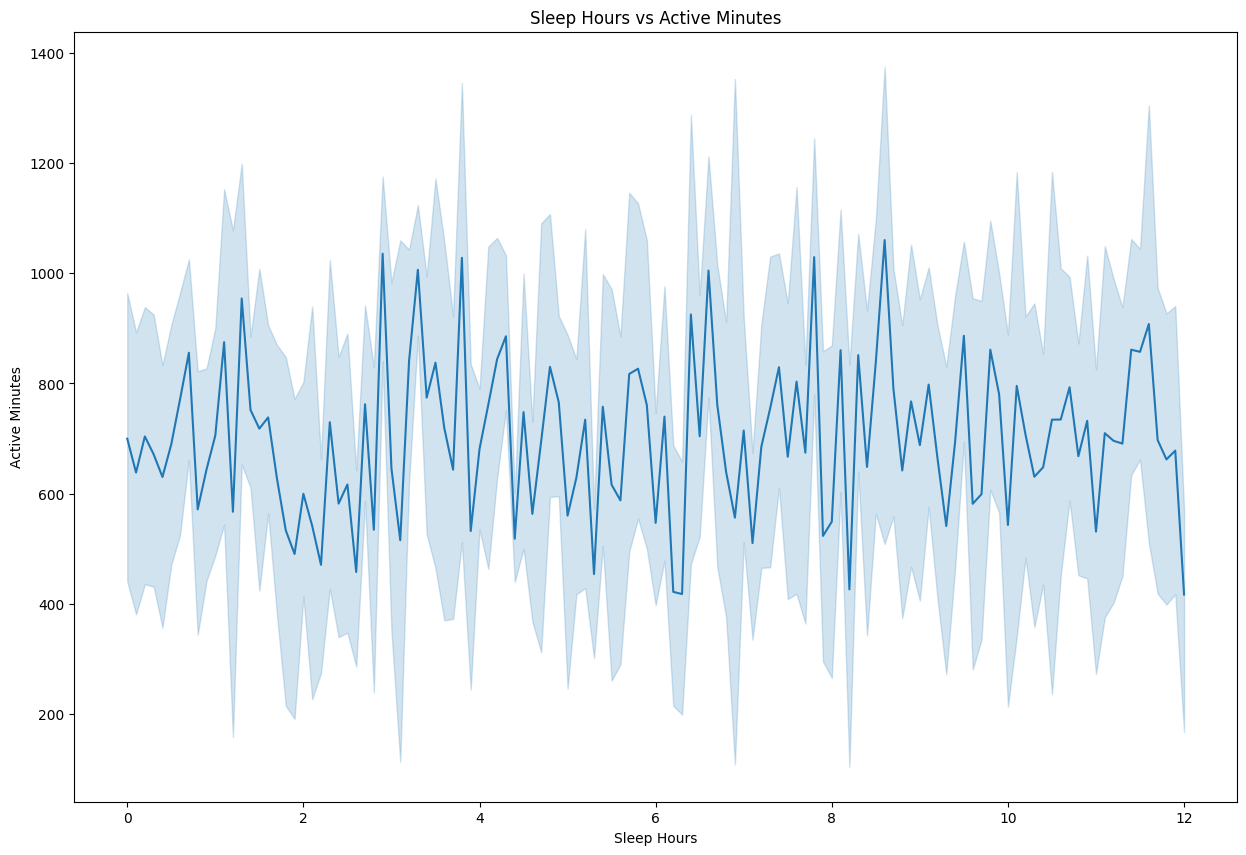

In [11]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df['sleep_hours'], y=df['active_minutes'])
plt.title("Sleep Hours vs Active Minutes")
plt.xlabel("Sleep Hours")
plt.ylabel("Active Minutes")
plt.show()

Average heart rate during different workout types

In [12]:
heart_rate_avg = df.groupby("workout_type")["heart_rate_avg"].mean()
print("Average heart rate by workout type:\n", heart_rate_avg)

Average heart rate by workout type:
 workout_type
Cycling        113.875000
Gym Workout    123.950413
Running        119.319728
Swimming       119.795181
Walking        116.080882
Yoga           120.744966
Name: heart_rate_avg, dtype: float64


Mood analysis based on sleep hours.

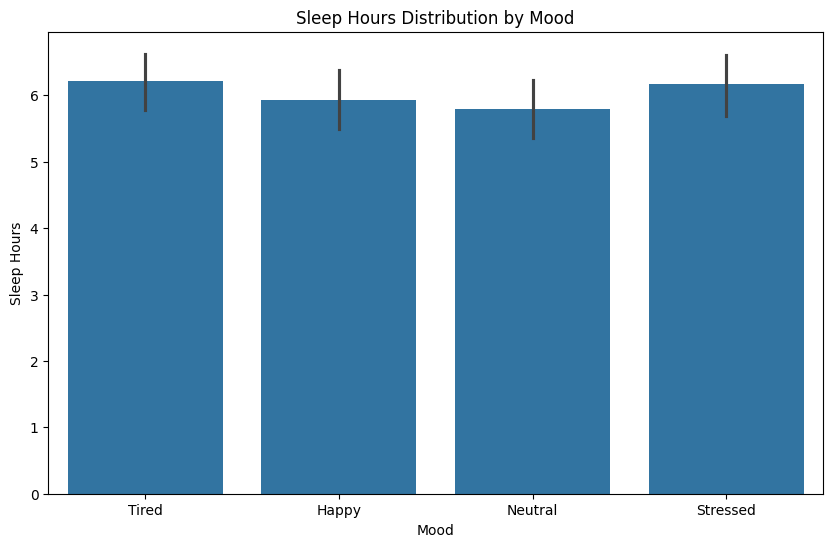

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['mood'], y=df['sleep_hours'])
plt.title("Sleep Hours Distribution by Mood")
plt.xlabel("Mood")
plt.ylabel("Sleep Hours")
plt.show()

Visualize how your step count changes over time.

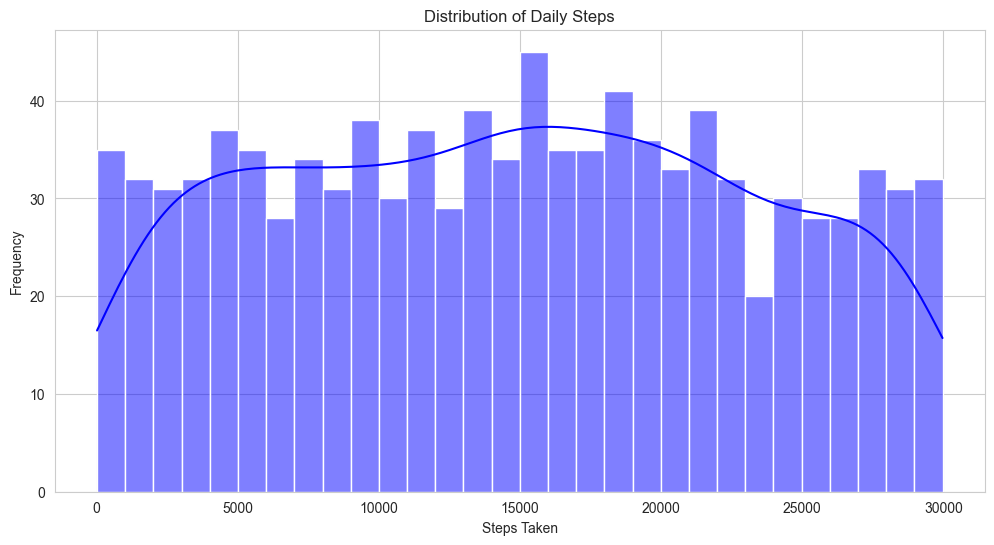

In [14]:
# Set a visual style
sns.set_style("whitegrid")

# Figure size setting
plt.figure(figsize=(12, 6))

# Plot distribution of steps taken
sns.histplot(df["steps"], bins=30, kde=True, color="blue")
plt.xlabel("Steps Taken")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Steps")
plt.show()


How steps relate to calories burned and activity level.

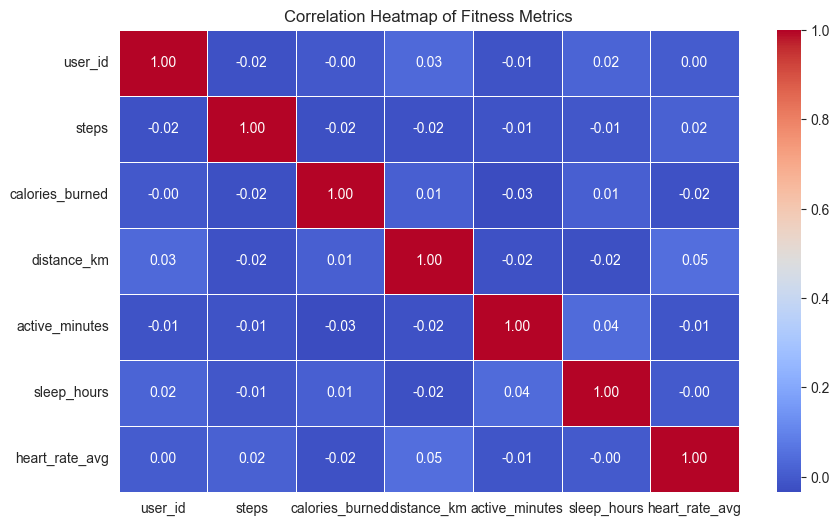

In [15]:
# Compute correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Fitness Metrics")
plt.show()

How does weather affect physical activity?

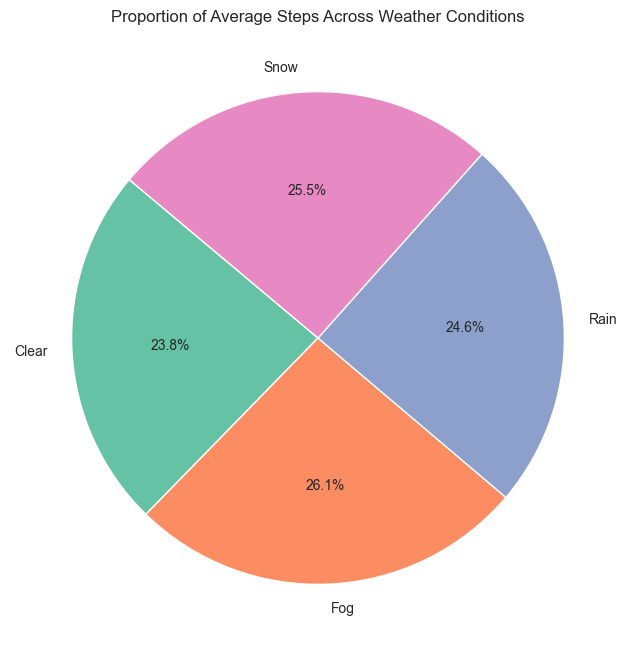

In [16]:
# Compute average steps per weather condition
weather_steps = df.groupby('weather_conditions')['steps'].mean()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
weather_steps.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=140)
plt.title("Proportion of Average Steps Across Weather Conditions")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()

How does heart rate vary with different workouts?

C:\Users\HP\AppData\Local\Temp\ipykernel_14536\1335475268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workout_type', y='heart_rate_avg', data=df, palette="Reds")


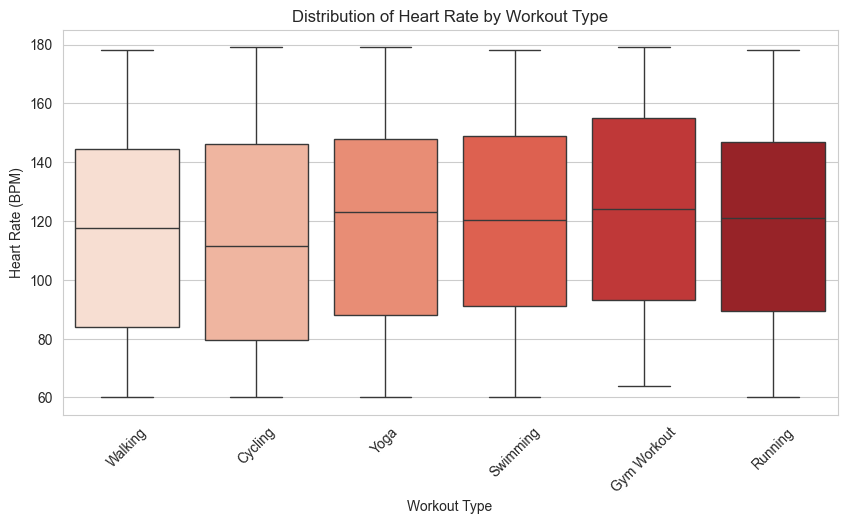

In [17]:
# Group by workout type and get average heart rate
workout_heart_rate = df.groupby('workout_type')['heart_rate_avg'].mean()

# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='workout_type', y='heart_rate_avg', data=df, palette="Reds")
plt.title("Distribution of Heart Rate by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Heart Rate (BPM)")
plt.xticks(rotation=45)
plt.show()

How does sleep affect mood?

C:\Users\HP\AppData\Local\Temp\ipykernel_14536\2148934605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['mood'], y=df['sleep_hours'], inner="quartile", palette="pastel")


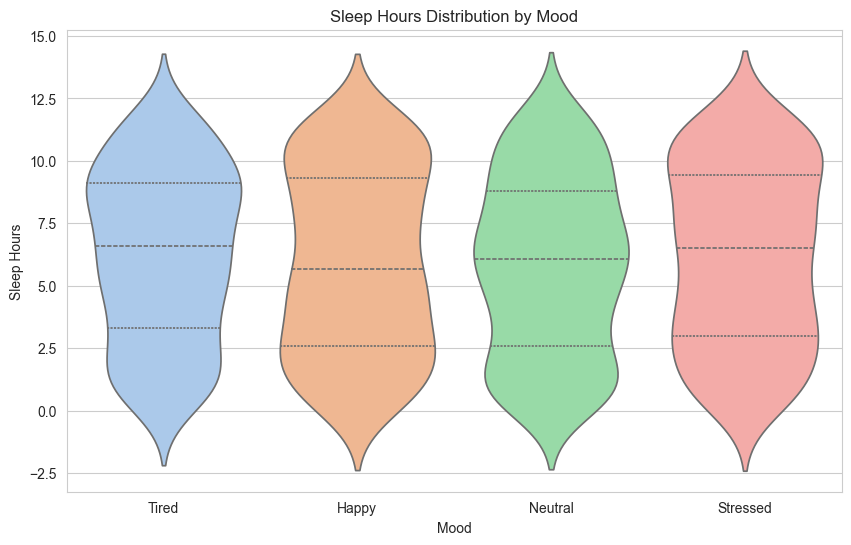

In [18]:
# Violin plot to visualize sleep distribution across moods
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['mood'], y=df['sleep_hours'], inner="quartile", palette="pastel")
plt.title("Sleep Hours Distribution by Mood")
plt.xlabel("Mood")
plt.ylabel("Sleep Hours")
plt.show()

How does your activity level change across different days of the week?

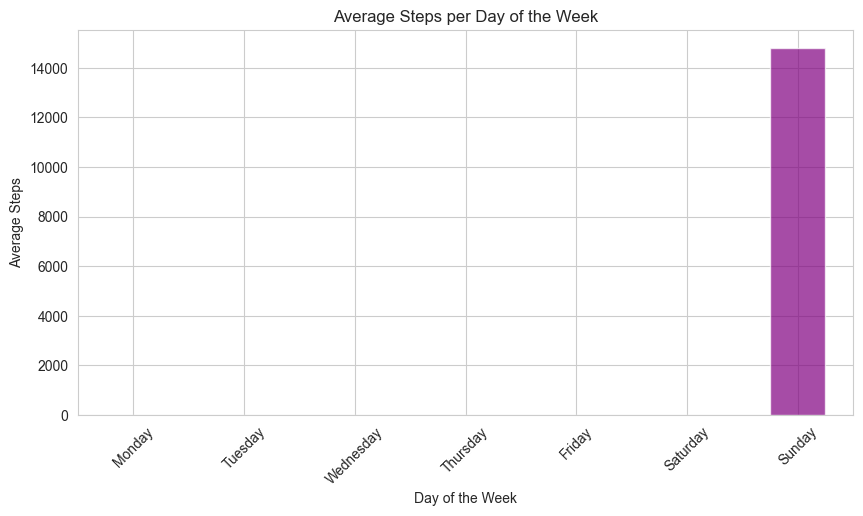

In [19]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Group by day and calculate the average steps
weekly_steps = df.groupby('day_of_week')['steps'].mean()

# Reorder days for better visualization
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_steps = weekly_steps.reindex(days_order)

# Bar plot
plt.figure(figsize=(10, 5))
weekly_steps.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Average Steps per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Steps")
plt.xticks(rotation=45)
plt.show()

Analysis of Daily Step Count Distribution

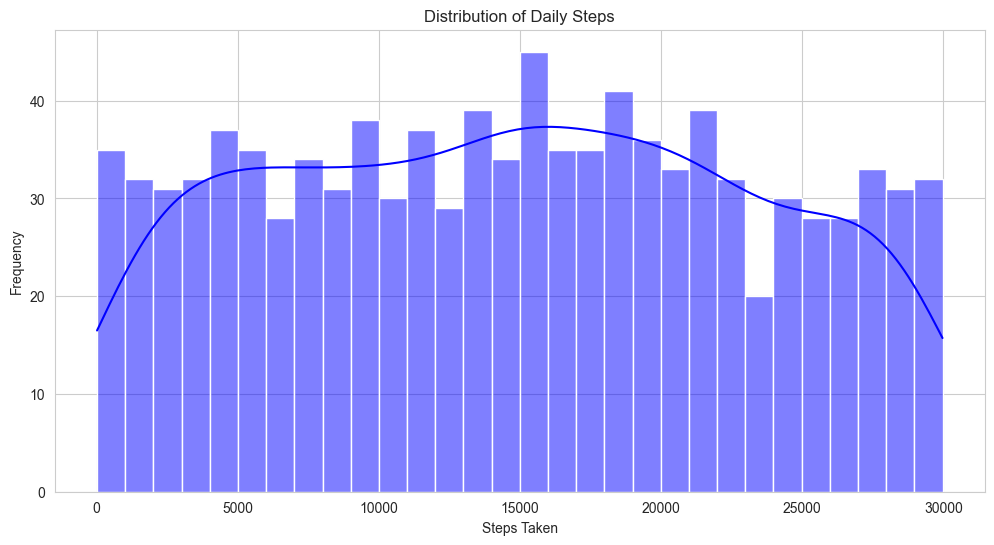

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df["steps"], bins=30, kde=True, color="blue")
plt.xlabel("Steps Taken")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Steps")
plt.show()